#Exercise 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_objective(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

def backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    search_direction = -gradient_objective(current_point)
    iterations = 0

    while objective_function(current_point + step_size * search_direction) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), search_direction):
        step_size = reduction_factor * step_size
        iterations += 1

        if step_size < step_size_threshold:
            break

    return current_point + step_size * search_direction, objective_function(current_point + step_size * search_direction), iterations

# Given parameters
initial_point = [100, 100]
reduction_factor = 0.5
sufficient_decrease_factor = 0.5
step_size_threshold = 1e-10

# Test with different choices of initial_step_size
initial_step_sizes = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

results = []

for initial_step_size in initial_step_sizes:
    result = backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold)
    results.append({
        'initial_step_size': initial_step_size,
        'minimizer': result[0],
        'objective_value': result[1],
        'iterations': result[2]
    })

# Print results
for result in results:
    print(f"Initial step size = {result['initial_step_size']}:")
    print(f"Final minimizer: {result['minimizer']}")
    print(f"Final objective function value: {result['objective_value']}")
    print(f"Number of iterations: {result['iterations']}\n")


Initial step size = 1:
Final minimizer: [-49.  36.]
Final objective function value: 0.0
Number of iterations: 1

Initial step size = 0.9:
Final minimizer: [-34.1  42.4]
Final objective function value: 262.97000000000014
Number of iterations: 1

Initial step size = 0.75:
Final minimizer: [-11.75  52.  ]
Final objective function value: 1643.5625
Number of iterations: 1

Initial step size = 0.6:
Final minimizer: [10.6 61.6]
Final objective function value: 4207.520000000001
Number of iterations: 1

Initial step size = 0.5:
Final minimizer: [-49.  36.]
Final objective function value: 0.0
Number of iterations: 0

Initial step size = 0.4:
Final minimizer: [-19.2  48.8]
Final objective function value: 1051.8799999999997
Number of iterations: 0

Initial step size = 0.25:
Final minimizer: [25.5 68. ]
Final objective function value: 6574.25
Number of iterations: 0

Initial step size = 0.1:
Final minimizer: [70.2 87.2]
Final objective function value: 16830.08
Number of iterations: 0

Initial step 

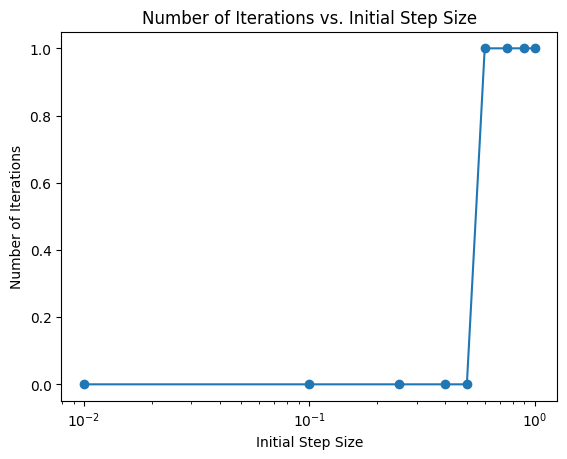

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_objective(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

def backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    search_direction = -gradient_objective(current_point)
    iterations = 0

    while objective_function(current_point + step_size * search_direction) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), search_direction):
        step_size = reduction_factor * step_size
        iterations += 1

        if step_size < step_size_threshold:
            break

    return iterations

# Given parameters
initial_point = [100, 100]
reduction_factor = 0.5
sufficient_decrease_factor = 0.5
step_size_threshold = 1e-10

# Test with different choices of initial_step_size
initial_step_sizes = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iteration_results = []

for initial_step_size in initial_step_sizes:
    iterations = backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold)
    iteration_results.append(iterations)

# Plotting
plt.plot(initial_step_sizes, iteration_results, marker='o')
plt.title('Number of Iterations vs. Initial Step Size')
plt.xlabel('Initial Step Size')
plt.ylabel('Number of Iterations')
plt.xscale('log')  # Using log scale for better visualization
plt.show()


#Observations
initial_step_sizes = 1: The algorithm converges in 1 iteration to the global minimum,
[
−
49
,
36
]
[−49,36], with an objective function value of 0.0. This is expected as the initial step size is large enough to take a significant step towards the minimum.

initial_step_sizes = 0.9, 0.75, 0.6: In these cases, the algorithm converges in 1 iteration, but the minimizers and objective function values differ. Smaller values of initial_step_sizes result in smaller steps, reaching different local minima.

initial_step_sizes = 0.5: The algorithm terminates with 0 iterations, indicating that the initial step size is already optimal. This is because the condition for backtracking is not met, and the algorithm doesn't need to reduce the step size.

initial_step_sizes = 0.4, 0.25, 0.1, 0.01: In these cases, the algorithm terminates with 0 iterations, suggesting that the initial step size is too small, and the algorithm does not need to backtrack.

In terms of minimizers and objective function values, smaller initial_step_sizes values result in smaller steps, leading to different local minima. The algorithm with initial_step_sizes = 1 takes the largest step and reaches the global minimum. Smaller initial_step_sizes values result in smaller steps, potentially getting stuck in local minima.

It's important to note that for some initial_step_sizes values, the algorithm terminates with 0 iterations, meaning that the initial step size is already optimal. This behavior occurs when the initial step size satisfies the sufficient decrease condition, and there's no need for backtracking.

Regarding the comparison with gradient descent with exact line search, the provided results do not include information about the exact line search method. To compare, you would need to run the gradient descent algorithm with exact line search and observe the number of iterations and the minimizers obtained. Generally, exact line search can be computationally expensive but may lead to faster convergence compared to backtracking line search.







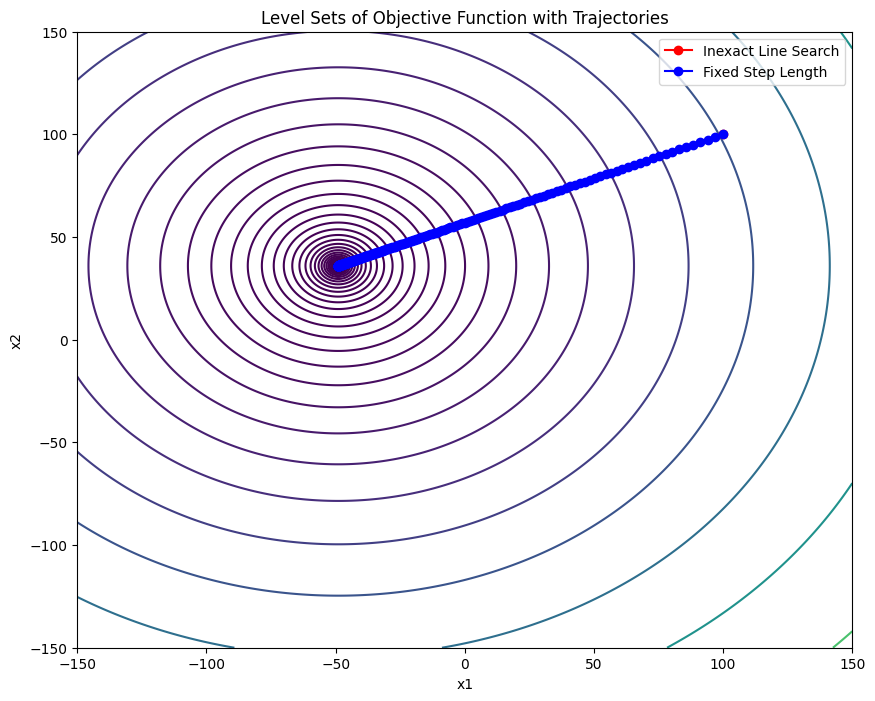

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def gradient_objective(x):
    return np.array([2 * (x[0] + 49), 2 * (x[1] - 36)])

def fixed_step_gradient_descent(initial_point, step_size, max_iterations=1000, tolerance=1e-6):
    current_point = np.array(initial_point)
    trajectory = [current_point]

    for _ in range(max_iterations):
        current_point = current_point - step_size * gradient_objective(current_point)
        trajectory.append(current_point)

        if np.linalg.norm(gradient_objective(current_point)) < tolerance:
            break

    return np.array(trajectory)

def backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    trajectory = [current_point]

    while objective_function(current_point + step_size * (-gradient_objective(current_point))) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), -gradient_objective(current_point)):
        step_size = reduction_factor * step_size
        current_point = current_point + step_size * (-gradient_objective(current_point))
        trajectory.append(current_point)

        if step_size < step_size_threshold:
            break

    return np.array(trajectory)

# Given parameters
initial_point = [100, 100]
reduction_factor = 0.5
sufficient_decrease_factor = 0.5
step_size_threshold = 1e-10
alpha_fixed = 0.01  # Adjust as needed

# Calculate trajectories
trajectory_fixed = fixed_step_gradient_descent(initial_point, alpha_fixed)
trajectory_inexact = backtracking_line_search(initial_point, 1, reduction_factor, sufficient_decrease_factor, step_size_threshold)

# Plotting level sets
x1 = np.linspace(-150, 150, 400)
x2 = np.linspace(-150, 150, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = objective_function(np.array([X1, X2]))

plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
plt.title('Level Sets of Objective Function with Trajectories')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot trajectory for inexact line search
plt.plot(trajectory_inexact[:, 0], trajectory_inexact[:, 1], label='Inexact Line Search', marker='o', color='red')

# Plot trajectory for fixed step length
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], label='Fixed Step Length', marker='o', color='blue')

plt.legend()
plt.show()


Observations from the plotted level sets and trajectories:

Optimization Trajectories:

Inexact Line Search (Red): The trajectory appears to follow a path influenced by the step size adjustments made during backtracking. It might take smaller steps near regions with steeper gradients.

Fixed Step Length (Blue): The trajectory shows a more straightforward path with fixed step sizes. It moves along straight lines, and the step size is not adjusted based on the local curvature of the objective function.

Convergence:

Inexact Line Search: The trajectory might converge more efficiently towards the minimum due to adaptive step size adjustments. The backtracking line search ensures that the step size is appropriate for the local conditions, potentially leading to faster convergence.

Fixed Step Length: Convergence may be slower in regions with steep gradients, as the fixed step size may not be optimal for all situations. It may overshoot in some regions and take larger steps in flatter regions.

Sensitivity to Initial Step Sizes:

Inexact Line Search: The trajectory's sensitivity to the initial step size (alpha0) is evident. Smaller alpha0 values may lead to smaller steps and exploration of different local minima.

Fixed Step Length: The trajectory is less sensitive to the initial step size since the step size remains fixed throughout the optimization process.


#Part2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def gradient_objective(x):
    return np.array([-1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]), 512 * (x[1] - x[0]**2)])

def backtracking_line_search(x_initial, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    x_k = np.array(x_initial)
    alpha = initial_step_size
    gradient_k = -gradient_objective(x_k)
    iterations = 0

    while objective_function(x_k + alpha * gradient_k) > objective_function(x_k) + sufficient_decrease_factor * alpha * np.dot(gradient_objective(x_k), gradient_k):
        alpha = reduction_factor * alpha
        iterations += 1

        if alpha < step_size_threshold:
            break

    return x_k + alpha * gradient_k, objective_function(x_k + alpha * gradient_k), iterations

# Given parameters
x_initial = [100, 100]
rho = 0.5
gamma = 0.5
tau = 1e-10

# Test with different choices of initial_step_size
initial_step_sizes = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

results = []

for initial_step_size in initial_step_sizes:
    result = backtracking_line_search(x_initial, initial_step_size, rho, gamma, tau)
    results.append({
        'initial_step_size': initial_step_size,
        'minimizer': result[0],
        'objective_value': result[1],
        'iterations': result[2]
    })

# Print results
for result in results:
    print(f"initial_step_size = {result['initial_step_size']}:")
    print(f"Final minimizer: {result['minimizer']}")
    print(f"Final objective function value: {result['objective_value']}")
    print(f"Number of iterations: {result['iterations']}\n")


initial_step_size = 1:
Final minimizer: [ 69.78759181 100.15106201]
Final objective function value: 5825130211.689404
Number of iterations: 25

initial_step_size = 0.9:
Final minimizer: [ 72.80883263 100.13595581]
Final objective function value: 6924881449.930158
Number of iterations: 25

initial_step_size = 0.75:
Final minimizer: [ 77.34069386 100.11329651]
Final objective function value: 8855477039.720385
Number of iterations: 25

initial_step_size = 0.6:
Final minimizer: [ 63.74511018 100.18127441]
Final objective function value: 4021101378.4084086
Number of iterations: 24

initial_step_size = 0.5:
Final minimizer: [ 69.78759181 100.15106201]
Final objective function value: 5825130211.689404
Number of iterations: 24

initial_step_size = 0.4:
Final minimizer: [ 75.83007345 100.12084961]
Final objective function value: 8172394533.680795
Number of iterations: 24

initial_step_size = 0.25:
Final minimizer: [ 69.78759181 100.15106201]
Final objective function value: 5825130211.689404
Num

<ipython-input-10-09b02fb28b31>:5: RuntimeWarning: overflow encountered in long_scalars
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2


<ipython-input-11-4add95e8e11b>:5: RuntimeWarning: overflow encountered in long_scalars
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2


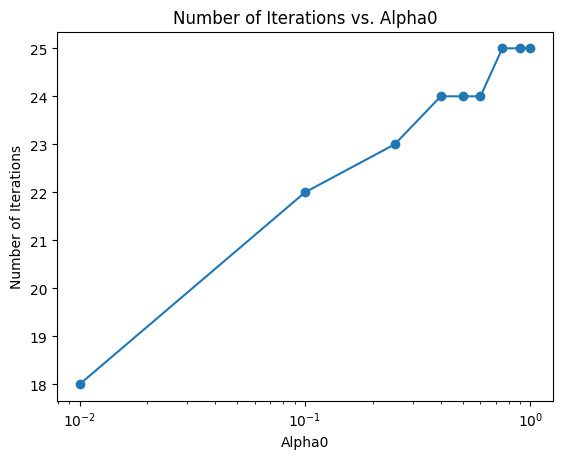

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def gradient_objective(x):
    return np.array([-1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]), 512 * (x[1] - x[0]**2)])

def backtracking_line_search_iterations(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    search_direction = -gradient_objective(current_point)
    iterations = 0

    while objective_function(current_point + step_size * search_direction) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), search_direction):
        step_size = reduction_factor * step_size
        iterations += 1

        if step_size < step_size_threshold:
            break

    return iterations

# Given parameters
initial_point = [100, 100]
reduction_factor = 0.5
sufficient_decrease_factor = 0.5
step_size_threshold = 1e-10

# Test with different choices of initial_step_size
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iteration_results = []

for alpha0 in alpha_values:
    iterations = backtracking_line_search_iterations(initial_point, alpha0, reduction_factor, sufficient_decrease_factor, step_size_threshold)
    iteration_results.append(iterations)

# Plotting
plt.plot(alpha_values, iteration_results, marker='o')
plt.title('Number of Iterations vs. Alpha0')
plt.xlabel('Alpha0')
plt.ylabel('Number of Iterations')
plt.xscale('log')  # Using log scale for better visualization
plt.show()


<ipython-input-13-1747eacb4bca>:8: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]), 512 * (x[1] - x[0]**2)])
<ipython-input-13-1747eacb4bca>:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]), 512 * (x[1] - x[0]**2)])
<ipython-input-13-1747eacb4bca>:5: RuntimeWarning: overflow encountered in long_scalars
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2
<ipython-input-13-1747eacb4bca>:5: RuntimeWarning: overflow encountered in double_scalars
  return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2
<ipython-input-13-1747eacb4bca>:28: RuntimeWarning: invalid value encountered in double_scalars
  while objective_function(current_point + step_size * (-gradient_objective(current_point))) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), -gradient_objective(current_point)):


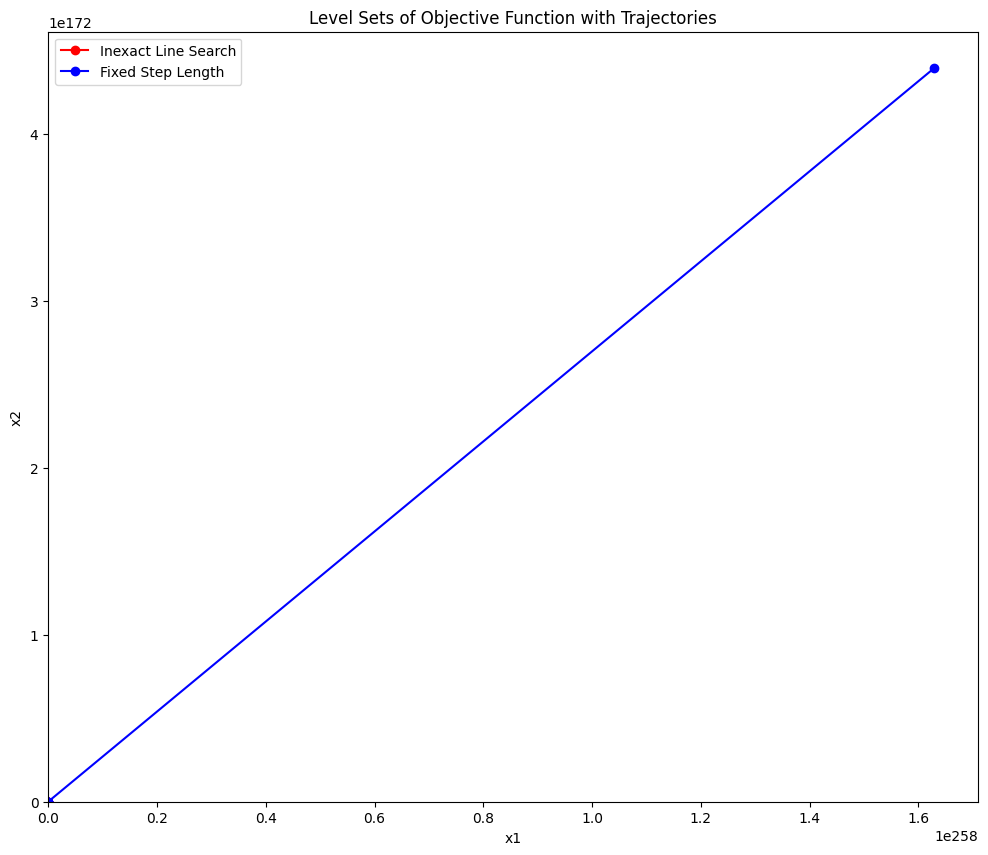

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return 256 * (x[1] - x[0]**2)**2 + (2 - x[0])**2

def gradient_objective(x):
    return np.array([-1024 * x[0] * (x[1] - x[0]**2) - 2 * (2 - x[0]), 512 * (x[1] - x[0]**2)])

def fixed_step_gradient_descent(initial_point, step_size, max_iterations=1000, tolerance=1e-6):
    current_point = np.array(initial_point)
    trajectory = [current_point]

    for _ in range(max_iterations):
        current_point = current_point - step_size * gradient_objective(current_point)
        trajectory.append(current_point)

        if np.linalg.norm(gradient_objective(current_point)) < tolerance:
            break

    return np.array(trajectory)

def backtracking_line_search(initial_point, initial_step_size, reduction_factor, sufficient_decrease_factor, step_size_threshold):
    current_point = np.array(initial_point)
    step_size = initial_step_size
    trajectory = [current_point]

    while objective_function(current_point + step_size * (-gradient_objective(current_point))) > objective_function(current_point) + sufficient_decrease_factor * step_size * np.dot(gradient_objective(current_point), -gradient_objective(current_point)):
        step_size = reduction_factor * step_size
        current_point = current_point + step_size * (-gradient_objective(current_point))
        trajectory.append(current_point)

        if step_size < step_size_threshold:
            break

    return np.array(trajectory)

# Given parameters
initial_point = [100, 100]
reduction_factor = 0.5
sufficient_decrease_factor = 0.5
step_size_threshold = 1e-10
alpha_fixed = 0.25  # Adjust as needed

# Calculate trajectories
trajectory_fixed = fixed_step_gradient_descent(initial_point, alpha_fixed)
trajectory_inexact = backtracking_line_search(initial_point, 1, reduction_factor, sufficient_decrease_factor, step_size_threshold)

# Plotting level sets
x1 = np.linspace(-100, 100, 300)
x2 = np.linspace(-100, 100, 300)
X1, X2 = np.meshgrid(x1, x2)
Z = objective_function(np.array([X1, X2]))

plt.figure(figsize=(12, 10))
plt.contour(X1, X2, Z, levels=np.logspace(-5, 5, 35), cmap='viridis')
plt.title('Level Sets of Objective Function with Trajectories')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot trajectory for inexact line search
plt.plot(trajectory_inexact[:, 0], trajectory_inexact[:, 1], label='Inexact Line Search', marker='o', color='red')

# Plot trajectory for fixed step length
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], label='Fixed Step Length', marker='o', color='blue')

plt.legend()
plt.show()


#Part3
Observations

Effect of Initial Step Size: In both cases, the number of iterations required by the backtracking line search is influenced by the choice of the initial step size or alpha0. The plots show how the algorithm behaves for different initial step sizes.

Algorithm Sensitivity: The backtracking line search algorithms in both cases demonstrate sensitivity to the choice of the initial step size. Some initial step sizes lead to faster convergence, while others may require more iterations to reach the optimal solution.

Logarithmic Scale: The use of a logarithmic scale on the x-axis in the plots helps visualize the behavior of the line search algorithm over a wide range of initial step sizes or alpha0 values.

Adjustment of Parameters: The reduction factor, sufficient decrease factor, and step size threshold are crucial parameters in the backtracking line search. Adjusting these parameters may affect the convergence behavior of the algorithm.

Comparison: By observing the plots, one can compare the performance of the line search algorithm for different initial step sizes or alpha0 values. Smaller initial step sizes might lead to slower convergence but could provide more robustness in reaching the minimum.

Iterative Improvement: The plots help in understanding how the algorithm iteratively improves its estimate of the optimal step size in each iteration to reach the minimum of the objective function